# Python para Computação Numérica
## SEMENDE 2021
## Andre Nepomuceno - UFF

In [119]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import brentq, newton, fsolve
from scipy.optimize import minimize, curve_fit
from scipy.integrate import quad
from scipy.integrate import solve_ivp

### 1. NumPy

In [120]:
a = np.array([1.,2,3.1])
a

array([1. , 2. , 3.1])

Exemplo:
\begin{gather}
 \begin{pmatrix} 
 1 & 3 \\ 2 & 4 \end{pmatrix}
 \begin{pmatrix} 
 4 & -2 \\ -3 & 1 \end{pmatrix}
  + 2
 %\frac{1}{\det(X)}
 \begin{pmatrix} 
 1 & 2 \\ 2 & 1 
 \end{pmatrix}
 =
 \begin{pmatrix} 
 3 & -5 \\ 0 & 2 \end{pmatrix} \nonumber
\end{gather}    

In [121]:
a = np.array([ [1,3], [2,4] ])
b = np.array([ [4,-2],[-3,1] ])
c = np.array([ [1,2], [2,1] ])

In [122]:
r = np.dot(a,b) + 2*c
print(r)

[[-3  5]
 [ 0  2]]


In [179]:
#lendo arquivos com NumPy
data_set = np.loadtxt("millikan.txt")
data_x = data_set[:,0]
data_y = data_set[:,1]

In [182]:
data_set[:3]

array([[5.4874e+14, 5.3090e-01],
       [6.9310e+14, 1.0842e+00],
       [7.4307e+14, 1.2734e+00]])

In [124]:
#Alg. Linear
A = np.array([[0,0.5], [-1,2]])
B = np. array([[2, -0.5] , [3, 1.5]])
print(A,'\n'); print(B)

[[ 0.   0.5]
 [-1.   2. ]] 

[[ 2.  -0.5]
 [ 3.   1.5]]


In [125]:
np.dot(A,B)

array([[1.5 , 0.75],
       [4.  , 3.5 ]])

In [126]:
A*B

array([[ 0.  , -0.25],
       [-3.  ,  3.  ]])

In [127]:
A.T   #ou A.transpose()

array([[ 0. , -1. ],
       [ 0.5,  2. ]])

**Autovalores e Autovetores**

In [128]:
#Autovalor e Autovetor
#autovalores e autovetores
vals, vecs = np.linalg.eig(A)
print(vals)

[0.29289322 1.70710678]


In [129]:
print(vals[0])

0.29289321881345254


In [130]:
#Autovetores
vecs

array([[-0.86285621, -0.28108464],
       [-0.50544947, -0.95968298]])

In [131]:
x1 = vecs[:,0]
print(x1)

[-0.86285621 -0.50544947]


**Sistemas de Equações Lineares**

\begin{gather}
\begin{pmatrix}
3 & -2 & 0\\
-2 & 1 & -3 \\
4 & 6 & 1
\end{pmatrix}
\begin{pmatrix}
x \\
y \\
z
\end{pmatrix}
= 
\begin{pmatrix}
8 \\
-20 \\
7
\end{pmatrix}
\nonumber
\end{gather}


In [132]:
M = np.array([ [3., -2, 0], [-2, 1, -3],[4, 6, 1]])
print(M)

[[ 3. -2.  0.]
 [-2.  1. -3.]
 [ 4.  6.  1.]]


In [133]:
b = np.array([8, -20, 7])

In [134]:
x, y, z = np.linalg.solve(M,b)
print('x = {}, y = {}, z = {}'.format(x,y,z))

x = 2.0, y = -1.0, z = 5.0


Exemplo:
Vamos escrever o sistema na forma matricial (RI = V)
\begin{gather}
\begin{pmatrix}
50 & 0 & -30\\
0 & 40 & -20 \\
-30 & -20 & 100
\end{pmatrix}
\begin{pmatrix}
I_1 \\
I_2 \\
I_3
\end{pmatrix}
= 
\begin{pmatrix}
80\\
80\\
0
\end{pmatrix}
\end{gather}

In [135]:
R = np.array([[50, 0, -30], [0, 40, -20], [-30, -20, 100]])
V = np.array([80,80,0])        

In [136]:
I1, I2, I3 = np.linalg.solve(R,V)
print('I1 = {:.2f} A'.format(I1))
print('I2 = {:.2f} A'.format(I2))
print('I3 = {:.2f} A'.format(I3))

I1 = 2.33 A
I2 = 2.61 A
I3 = 1.22 A


### 2. Matplotlib

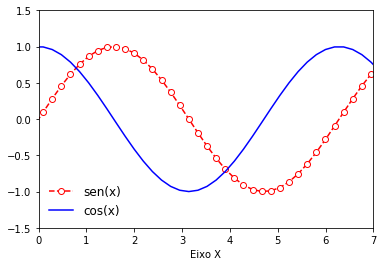

In [178]:
x = np.linspace(-3*np.pi,3*np.pi,100)
y = np.sin(x)
z = np.cos(x)
#plt.plot(x,y)
#plt.plot(x,z)
plt.plot(x,y,'r--',marker='o',mec='r',mfc='w',markersize=6,label='sen(x)')
plt.plot(x,z,c='b',label='cos(x)')
plt.xlim(0,7)
plt.ylim(-1.5,1.5)
plt.xlabel('Eixo X')
plt.legend(loc=3,fontsize=12,frameon=False)
plt.savefig('my_plot.pdf')
#ax = plt.gca()
#ax.tick_params(labelsize=15)

**Plot com dois eixos verticais**

In [138]:
tempo = np.arange(2000,2010)
margarina = np.array([8.2,7,6.5,5.3,5.2,4,4.6,4.5,4.2,3.7])
divorcios = np.array([5.,4.7,4.6,4.4,4.3,4.1,4.2,4.2,4.2,4.1])

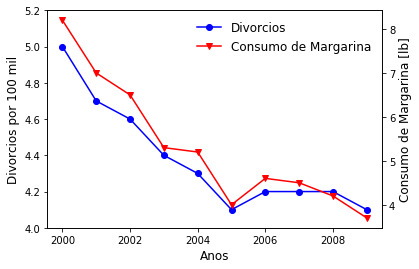

In [139]:
line1 = plt.plot(tempo,divorcios,'b-o')
plt.ylim(4,5.2)
plt.ylabel('Divorcios por 100 mil',fontsize=12)
plt.xlabel('Anos',fontsize=12)
plt.twinx()
line2 = plt.plot(tempo,margarina,'r-v')
plt.ylabel('Consumo de Margarina [lb]',fontsize=12)
lines = line1 + line2
legendas = ['Divorcios','Consumo de Margarina']
plt.legend(lines, legendas, frameon=False,fontsize=12)

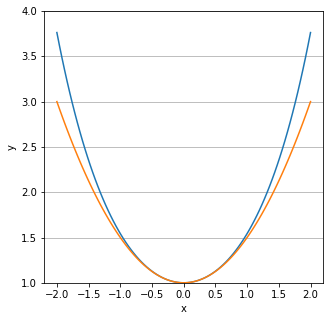

In [140]:
#Exemplo com inerface orientada a objetos
fig = plt.figure("Fig2", figsize=(5,5))
ax = fig.add_subplot()
x = np.linspace(-2,2,100)
ax.plot(x,np.cosh(x))
ax.plot(x,1+x**2/2)
ax.set_ylim(1,4.0)
ax.set_xlabel('x')
ax.set_ylabel('y')
#ax.grid(True)
ax.yaxis.grid(True)

**Subplots**

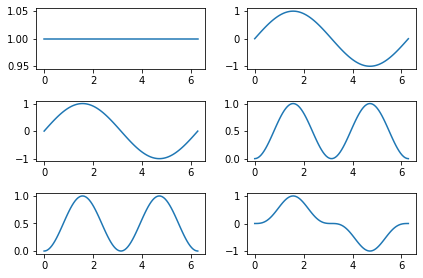

In [141]:
fig, axes = plt.subplots(nrows=3, ncols =2)
fig.tight_layout()
x = np.linspace(0,2*np.pi,100)
for i in range(3):
    for j in range(2):
        axes[i,j].plot(x,(np.sin(x)**(i+j)))

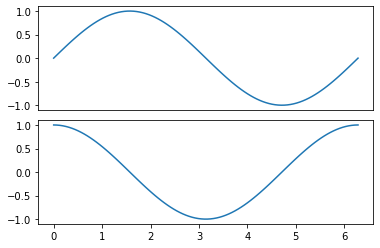

In [142]:
#Plots juntos
fig, axes = plt.subplots(2,1)
fig.subplots_adjust(hspace=0.1)
x = np.linspace(0,2*np.pi,100)
axes[0].plot(x,np.sin(x))
axes[0].set_xticks([])
axes[1].plot(x,np.cos(x))

**Scatter Plots**

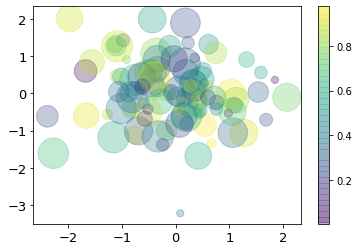

In [143]:
x = np.random.randn(100)
y = np.random.randn(100)
colors = np.random.rand(100)
sizes = 1000*np.random.rand(100)
plt.scatter(x, y, c=colors, s=sizes, alpha=0.3)
plt.colorbar()
plt.tick_params(labelsize=13)

**Gráficos de Barra**

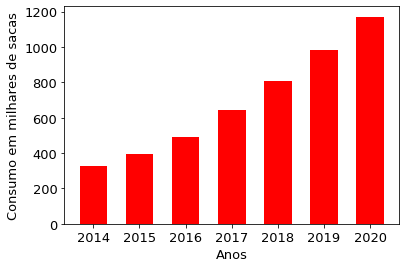

In [144]:
anos = np.arange(2014,2021)
consumo = np.array([327,392,490,643,806,981,1171])
plt.bar(anos, consumo, width=0.6,color='r',edgecolor=None)
#plt.barh(anos, consumo, height=0.6,color='r')
plt.xlabel('Anos',fontsize=13)
plt.ylabel('Consumo em milhares de sacas',fontsize=13)
plt.tick_params(labelsize=13)

**Gráfico de Pizza**

done


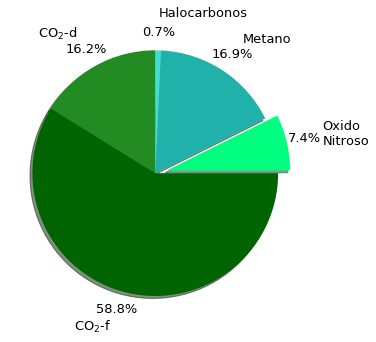

In [145]:
# Emissao anual de gases do efeito estufa.
gas_emissions = {'fonte':['$\mathrm{CO_2}$-d','$\mathrm{CO_2}$-f',
                          'Oxido\nNitroso','Metano','Halocarbonos'],
                'emissao':[2.2,8.0,1.0,2.3,0.1]}
#cores das fatias
colours = ['forestgreen', 'darkgreen', 'springgreen', 'lightseagreen', 'turquoise']

explode = [0, 0, 0.1, 0, 0]

fig, ax = plt.subplots(figsize=(5.5,5))
ax.pie(gas_emissions['emissao'],colors=colours,shadow=True, startangle=90,
       explode=explode, labels=gas_emissions['fonte'], autopct='%.1f%%',
        pctdistance=1.15, labeldistance=1.3,textprops={'fontsize': 13})
ax.axis('equal')
print('done')
#o seguimento do oxido nitroso é deslocado por 10%
# autopct='%.1f%%' significa valores com uma casa decimal.
# pctdistance, labeldistance são as distâncias radiais
#dos valores e texto, respectivamente.
#Veja lista de cores em: https://matplotlib.org/stable/gallery/color/named_colors.html

### 3. SciPy

**Encontrando raízes de funções**

Exemplo:
\begin{equation}
    f(x) \, = \, \frac{1}{5} + x \textrm{cos} \left ( \frac{3}{x} \right ).
    \nonumber
\end{equation}

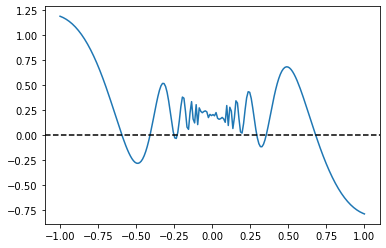

In [146]:
f1 = lambda x: 0.2 + x*np.cos(3/x)
x = np.linspace(-1,1,200)
plt.plot(x,f1(x))
plt.axhline(0, c='k',ls='--')

In [147]:
#intervalo [-0.7,-0.5]
print(np.sign(f1(-0.7)))
print(np.sign(f1(-0.5)))

1.0
-1.0


In [148]:
#calcule as raizes
brentq(f1,-0.7,-0.5)

-0.5933306271014237

**Sistemas de Eq. não Lineares**

In [149]:
def f(x):
    return [ x[1] - x[0]**3 - 2*x[0]**2 +1, x[1]+x[0]**2 - 1 ]

In [150]:
xsol = fsolve(f,[1,1])
print(xsol)

[0.73205081 0.46410162]


In [151]:
np.isclose(f(xsol),0.)

array([ True,  True])

**Minimização sem vínculo**

Função de Himmelblau 
\begin{equation}
  f(x,y) \,=\, (x^2 +y - 11)^2  + (x + y^2 -7)^2  \nonumber
\end{equation}

In [152]:
#implementa função de Himmelblau
def f(X):
    x,y = X
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

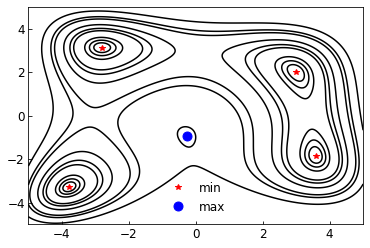

In [153]:
#Vamos fazer um gráfico de contorno da função
f2 = lambda x,y: (x**2 + y - 11)**2 + (x + y**2 - 7)**2
x = np.linspace(-5,5,500)
X,Y = np.meshgrid(x,x)
f1,ax = plt.subplots()
ax.contour(X,Y,f2(X,Y),[0,2,5,10,30,40,60,100,120,180],colors='k')
xmin = [-3.78,-2.80,3,3.58]
ymin= [-3.28,3.13,2,-1.85]
xmax = -0.2709
ymax = -0.923
ax.plot(xmin,ymin,marker='*',c='r',ls='',label='min')
ax.plot(xmax,ymax,marker='o',markersize=9,c='b',ls='',label='max')
ax.tick_params(direction='in',labelsize=12)
ax.legend(loc='lower center',frameon=False,fontsize=12)

In [154]:
x0 = [0,0]
minimize(f,x0)

      fun: 1.3782261326630835e-13
 hess_inv: array([[ 0.01578229, -0.0094806 ],
       [-0.0094806 ,  0.03494937]])
      jac: array([-3.95019832e-06, -1.19075540e-06])
  message: 'Optimization terminated successfully.'
     nfev: 64
      nit: 10
     njev: 16
   status: 0
  success: True
        x: array([2.99999994, 1.99999999])

In [155]:
#vamos maximizar a função
mf = lambda X: -f(X)
minimize(mf,[0.1,-0.2],method='Nelder-Mead')

 final_simplex: (array([[-0.27087419, -0.9230486 ],
       [-0.27089208, -0.92298798],
       [-0.27077447, -0.92304541]]), array([-181.6165215 , -181.61652146, -181.61652141]))
           fun: -181.61652150067573
       message: 'Optimization terminated successfully.'
          nfev: 77
           nit: 39
        status: 0
       success: True
             x: array([-0.27087419, -0.9230486 ])

In [156]:
#regiao onde a funcao será minimizada: x < 0 e y <0
xlimites = (None,0)
ylimites = (None,0)
contorno = (xlimites,ylimites)
x0 = (-0.5,-0.5)

In [157]:
minimize(f,x0,bounds=contorno,method='slsqp')

     fun: 4.115667606325133e-08
     jac: array([-0.00283595, -0.00034243])
 message: 'Optimization terminated successfully.'
    nfev: 50
     nit: 11
    njev: 11
  status: 0
 success: True
       x: array([-3.77933774, -3.28319868])

**Ajuste de Curvas**

In [158]:
#difinir a função f(x) (Lorentziana)
def f(x,x0,A,gamma):
    return A*gamma**2/(gamma**2 + (x-x0)**2)    

In [159]:
#Vamos simular alguns dados
npoints = 100
x = np.linspace(1,20,npoints)
x0, A, gamma = 12,3,5
yexato = f(x,x0,A,gamma)
erro_y = np.ones(npoints)*0.7
ydata = yexato + np.random.randn(npoints)*erro_y

In [160]:
#Ajuste com os erros
p0 = [10,4,2]
params, pcov = curve_fit(f,x,ydata,p0, sigma=erro_y, absolute_sigma=True,check_finite=True)
print(params)
print(pcov)

[12.25174228  3.09349582  5.02113941]
[[ 0.06663739 -0.00130165  0.00781512]
 [-0.00130165  0.02574052 -0.04916497]
 [ 0.00781512 -0.04916497  0.18366164]]


In [161]:
#Erro nos parametros:
err_par = np.sqrt(np.diag(pcov))
print(err_par)

[0.25814219 0.16043853 0.42855762]


Text(9, 0.1, '$\\gamma$  = 5.02 $\\pm$ 0.43')

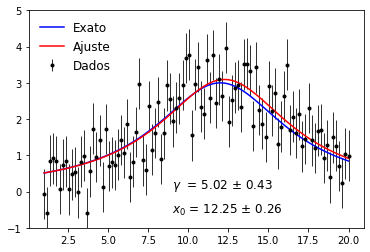

In [162]:
#Comparar os resultados graficamente
yfit = f(x,*params)
plt.errorbar(x,ydata,yerr=erro_y, color = 'k',elinewidth=0.8,lw=0,marker='.',label='Dados')
plt.plot(x,yexato,c='b',label='Exato')
plt.plot(x,yfit,c='r',label='Ajuste')
plt.ylim(-1,5)
plt.legend(frameon=False,loc='upper left',fontsize=12)
info1 = '$x_0$ = {:.2f} $\pm$ {:.2f}'.format(params[0],err_par[0])
info2 = '$\gamma$  = {:.2f} $\pm$ {:.2f}'.format(params[2],err_par[2])
plt.text(9,-0.6,info1,fontsize=12)
plt.text(9,0.1,info2,fontsize=12)

**Integral Própria**
\begin{equation}
    I  \,=\, \int_{1}^4 x^{-2} dx
\nonumber
\end{equation}

In [163]:
f1 = lambda x: 1/x**(2)

In [164]:
quad(f1,a=1,b=4)

(0.7500000000000002, 1.913234548258995e-09)

**Equações Diferenciais**

**Exemplo 1 - Uma eq. de primeira ordem**
\begin{equation}
    \frac{dy}{dt} \,=\, - ky \nonumber
\end{equation}

In [165]:
k = 0.2
#valor de y em t = 0
y0 = 100
#intervalo de tempo
t0, tf = 0,20

In [166]:
def dydt(t,y):
    return -k*y

In [167]:
solve_ivp (dydt , (t0 , tf), [y0])

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 44
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0.        ,  0.13797324,  1.51770566,  6.11233264, 10.70695962,
       15.30158659, 19.89621357, 20.        ])
 t_events: None
        y: array([[100.        ,  97.27826059,  73.81996665,  29.46989971,
         11.76477081,   4.69665094,   1.87496471,   1.83644668]])

In [168]:
sol1 = solve_ivp (dydt ,(t0, tf), [y0])
sol1.y

array([[100.        ,  97.27826059,  73.81996665,  29.46989971,
         11.76477081,   4.69665094,   1.87496471,   1.83644668]])

**Exemplo 2 - EDOs acopladas**
\begin{eqnarray*}
\frac{dS}{dt}& = &-\beta SI, \\
\frac{dI}{dt}& = &\beta SI - \gamma I, \\
\frac{dR}{dt}& = & \gamma I, \\
\end{eqnarray*}

In [169]:
#Definir N e valores iniciais
N = 100000
S0 = N-2
I0 = 2
R0 = 0
t0,tf = 0,120 #120 dias

In [170]:
#definir as funcoes
def dydt(t,y,beta=5.0e-6,gamma=0.2):
    S,I,R = y
    dSdt = -beta*S*I
    dIdt = beta*S*I - gamma*I
    dRdt = gamma*I
    return dSdt, dIdt, dRdt

In [171]:
sol3 = solve_ivp(dydt,(t0, tf), y0=[S0,I0,R0],dense_output=True)
#sol3 = solve_ivp(dydt,(t0, tf), y0=[S0,I0,R0],args=(beta,gamma)) (scipy > 1.4)
print(sol3.success)

True


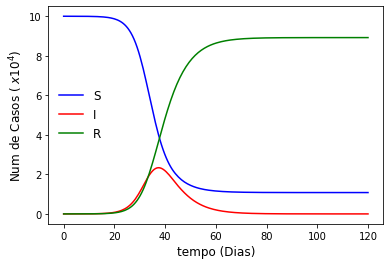

In [172]:
#vamos plotar as soluções
t = np.linspace(t0,tf,200)
st = sol3.sol(t)[0]/1e4
it = sol3.sol(t)[1]/1e4
rt = sol3.sol(t)[2]/1e4
plt.plot(t,st,'b',label='S')
plt.plot(t,it,'r',label='I')
plt.plot(t,rt,'g',label='R')
plt.xlabel('tempo (Dias)',fontsize=12)
plt.ylabel('Num de Casos ( $x 10^4$)',fontsize=12)
plt.legend(frameon=False,loc='center left',fontsize=12)

**Exemplo 3 - EDOs de Segunda Ordem**
\begin{equation}
    \frac{d^2x}{dt^2} \,=\, - \omega^2 x \nonumber
\end{equation}

In [173]:
#fazemos x1 = x e x2 = dx/dt (velc.)
#dx1/dt = x2
#dx2/dt = -omega^2x1

In [174]:
omega = 0.9
A = 3
v0 = 0
t0,tf = 0,20

In [175]:
def dxdt(t,x):
    x1,x2 = x
    dx1dt = x2
    dx2dt = -omega**2*x1
    return dx1dt,dx2dt

In [176]:
sol4 = solve_ivp(dxdt,(t0,tf),y0=[A,v0],dense_output=True)
print(sol4.success)

True


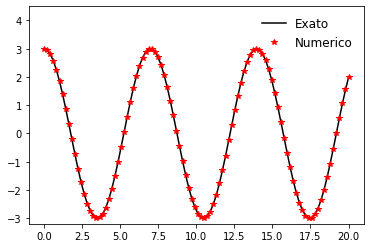

In [177]:
#plot solução
t = np.linspace(t0,tf,100)
x_ext = lambda x: A*np.cos(omega*t)
plt.plot(t,x_ext(t),'k',label='Exato')
plt.plot(t,sol4.sol(t)[0],'r*',label='Numerico')
plt.ylim(-3.2,4.5)
plt.legend(frameon=False,fontsize=12,loc='upper right')